In [1]:
#recreates homework #1 from econ 534 in Python
#test for heteroskedasticity using the White (1980) test
#also show how to use WLS/GLS to correct for hetereoskedasticity
#White test for heteroskedasticity
#call in homepriceV10.dta data


In [2]:
import pandas as pd
hpv10data = 'C:/Users/jfras/OneDrive/UND/534AppliedEcon/Datasets/homepriceV10.dta'
#make sure you preserve data types, otherwise it all comes in as strings
df = pd.read_stata(hpv10data, preserve_dtypes=True)
df.tail()

,id,price,floor,lot,bath,bed,bathbed,year,age,agesq,gar,status,dac,school,ded,dha,dad,dcr,dpa
71,72,249.899994,2081.000000,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.000000,2043.999878,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.000000,2253.000000,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.899994,1861.000000,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1
75,76,349.500000,2896.000000,4,3.0,5,15.0,1979,0.9,0.81,2,Active,1,Crest,0,0,0,1,0


In [3]:
print('Check your data Datatypes after import')
print(df.dtypes)

Check your data Datatypes after import
id            int8
price      float32
floor      float32
lot           int8
bath       float32
bed           int8
bathbed    float32
year         int16
age        float32
agesq      float32
gar           int8
status      object
dac           int8
school      object
ded           int8
dha           int8
dad           int8
dcr           int8
dpa           int8
dtype: object


In [4]:
df.describe()

,id,price,floor,lot,bath,bed,bathbed,year,age,agesq,gar,dac,ded,dha,dad,dcr,dpa
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,38.500000,285.796112,1970.394775,3.986842,2.207895,3.447368,7.672367,1969.407895,-0.059211,5.449868,1.565789,0.328947,0.157895,0.184211,0.039474,0.078947,0.197368
std,22.083176,60.333218,212.419968,1.653227,0.570325,0.737468,2.764663,23.492511,2.349251,8.206545,0.771760,0.472953,0.367065,0.390232,0.196013,0.271448,0.400657
min,1.000000,155.500000,1440.000000,1.000000,1.000000,2.000000,2.000000,1905.000000,-6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.750000,242.750000,1860.750000,3.000000,2.000000,3.000000,6.000000,1957.750000,-1.225000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.500000,276.000000,1966.500000,4.000000,2.000000,3.000000,6.300000,1969.500000,-0.050000,1.220000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.250000,336.750000,2107.500000,5.000000,3.000000,4.000000,9.000000,1980.000000,1.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,76.000000,450.000000,2896.000000,11.000000,3.100000,6.000000,15.000000,2005.000000,3.500000,42.250000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape
#(rows,columns)

(76, 19)

<Figure size 432x288 with 0 Axes>

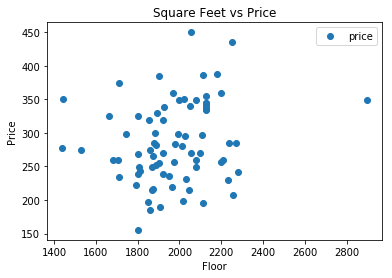

In [42]:
#have to execute this block twice before graph shows up 7-14-2020
import numpy as np
import matplotlib.pyplot as plt
#some options...
#plt.ion()
#plt.figure(figsize=(15,10))
plt.tight_layout()
#now the plot
df.plot(x='floor', y='price', style='o')
plt.title('Square Feet vs Price')
plt.xlabel('Floor')  
plt.ylabel('Price')
plt.pause(.10)
plt.show(block=False)

#legend disappears with this method below
##plt.plot('floor', 'price', 'o', data=df)

C:\Users\jfras\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


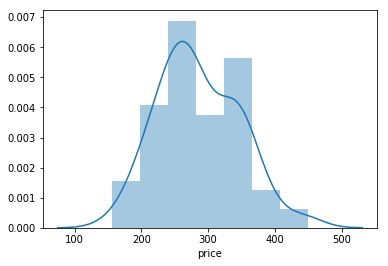

In [7]:
import seaborn as seabornInstance 
#plt.figure(figsize=(15,10))
#plt.tight_layout()
seabornInstance.distplot(df['price'])

In [8]:
#setup 3 variables as independent variables
# tried df2 = pd.DataFrame(hpv10data,columns=['id','price','floor','lot','bath','bed','bathbed','year','age','agesq','gar','status','dac','school','ded','dha','dad','dcr','dpa'])
# tried X=df['floor'].values.reshape(-1,1)
X = pd.read_stata(hpv10data,columns=['floor', 'lot', 'bed']).values
X.shape

(76, 3)

In [9]:
y = df['price'].values.reshape(-1,1)
y.shape

(76, 1)

In [10]:
#create the regression using stats models
#could have done it this way but
#sklearn does not have nice anova table so we will use stats models
#from sklearn.linear_model import LinearRegression
#regress price on lot, floor, bed
#regr = LinearRegression()
#regr.fit(X, y)

#using stats models
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#regress price on lot, floor, bed
expr1 = 'y ~ lot + floor + bed'
lm1 = ols(expr1, df).fit()
print(lm1.summary())

#print(regr.intercept_)
#print(regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     5.449
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00197
Time:                        07:17:30   Log-Likelihood:                -411.15
No. Observations:                  76   AIC:                             830.3
Df Residuals:                      72   BIC:                             839.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    199.5321     64.415      3.098      0.0

In [11]:
#you can use these commands to print the attributes of the regeression, similair to stata's "e"
#print("summary()\n",lm1.summary())
#print("pvalues()\n",lm1.pvalues)
#print("tvalues()\n",lm1.tvalues)
print("rsquared()\n",lm1.rsquared)
#print("rsquared_adj()\n",lm2.rsquared_adj)
print("parameters()\n",lm1.params)

rsquared()
 0.18502569189605078
parameters()
 Intercept    199.532070
lot            6.051861
floor          0.076634
bed          -25.777043
dtype: float64


In [12]:
#now show the residual, white noise?

[287.69335256 284.08933584 288.53410495 294.79530553 240.41686851
 303.04595737 258.5724515  293.36426488 267.92179342 299.59742961
 321.05493566 263.78356011 290.09704086 305.72814563 262.78731876
 300.21050122 272.36656253 257.45319916 284.58161751 250.70941154
 349.20096801 237.39344542 276.27488464 269.83542111 308.25928705
 297.68380193 281.56263655 279.44936392 290.7078914  306.49448513
 273.69737553 251.52212809 272.2457726  291.17213723 201.65843094
 226.74354741 283.65756798 315.00307466 311.70115161 315.6139252
 310.06380282 301.33197463 256.35228801 290.94001431 267.92623555
 286.42083232 335.18361833 307.79948335 250.2679584  283.8896909
 243.29648065 292.31942541 285.77972488 288.46191313 285.1158341
 290.09704086 281.43518343 305.80700064 291.17657936 291.17657936
 291.17657936 291.17657936 291.17657936 283.65756798 270.06754403
 319.36454663 297.68602299 273.92949844 296.37880371 292.01288961
 315.61614626 286.1584525  259.11554299 361.427701   263.24712246
 316.78621778

Text(0.5,1,'Actuals vs Regresion Line')

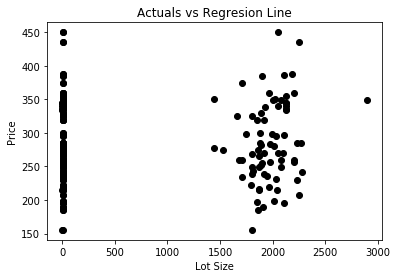

In [13]:
#first create the predicted value of y
yhat = lm1.predict()
print(yhat)
plt.plot(X, y, 'o', color='black')
plt.xlabel('Lot Size')  
plt.ylabel('Price')
plt.title("Actuals vs Regresion Line")

#https://www.statsmodels.org/v0.10.2/examples/notebooks/generated/predict.html

C:\Users\jfras\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Residual')

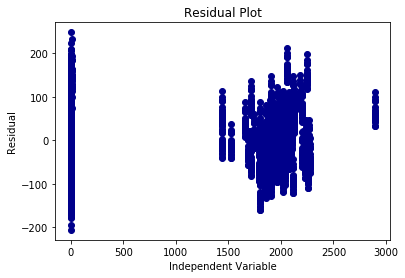

In [14]:
# get residual (uhat)
uhat= y-yhat
plt.plot(X,uhat, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

In [15]:
#some white test instructions
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.power_divergence.html#scipy.stats.power_divergence
#https://www.programiz.com/python-programming/tuple
#https://mgimond.github.io/Stats-in-R/ChiSquare_test.html

In [16]:
#SHORT METHOD FOR WHITE TEST for expr1

In [17]:
# now finally the white test for heteroskedasticity, using patsy dmatrices function from statsmodels library
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices
#prep the expression for the dmatrices function
#from above expr1 = 'y ~ lot + floor + bed'
#set up the dataframe
uhat, X = dmatrices(expr1, df, return_type='dataframe')
#execute the test
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(uhat, X)
lzip(keys, results)
#print("heteroskedasticity is a problem here")


[('Lagrange Multiplier statistic:', 23.477103601988624),
 ("LM test's p-value:", 0.005209234235067892),
 ('F-statistic:', 3.277911886464468),
 ("F-test's p-value:", 0.0023546410927008307)]

In [18]:
#2ND SHORT METHOD OF WHITE TEST FOR expr1
#white test
#statsmodels.stats.diagnostic.het_white(residuals-array, regressors-array)
sm.stats.diagnostic.het_white(uhat, X)

#https://medium.com/keita-starts-data-science/heteroskedasticity-in-linear-regressions-and-python-16eb57eaa09

(23.477103601988624,
 0.005209234235067892,
 3.277911886464468,
 0.0023546410927008307)

In [19]:
#print White's 1980 Robust Standard errors
print("HC0_se()\n",lm1.HC0_se)
#https://www.statsmodels.org/0.8.0/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

HC0_se()
 Intercept    57.374840
lot           4.088143
floor         0.026044
bed           8.310545
dtype: float64


In [20]:
#LONG METHOD FOR WHITE TEST
#now do the white test for heteroskedasticity showing the work done by the library function het_white behind the scenes

In [21]:
#create some interaction variables
df['uhat_2'] = uhat * uhat
df['lot_floor'] = df.lot * df.floor
df['lot_bed'] = df.lot * df.bed
df['floor_bed'] = df.floor * df.bed
df['lot_2'] = df.lot * df.lot
df['floor_2'] = df.floor * df.floor
df['bed_2'] = df.bed * df.bed
#check the dataframe, previously was 19 columns, should have added 7 columns for a total of 26
df.shape
#df.tail()



(76, 26)

In [22]:
#examine the 7 new columns
df.tail()
#if you make a mistake you can drop a variable with for example df.drop([uhat_2,axis=1])
#axis=1 means column not a row

,id,price,floor,lot,bath,bed,bathbed,year,age,agesq,...,dad,dcr,dpa,uhat_2,lot_floor,lot_bed,floor_bed,lot_2,floor_2,bed_2
71,72,249.899994,2081.000000,5,2.1,4,8.4,1970,0.0,0.00,...,0,0,0,62450.006949,10405.000000,20,8324.000000,25,4330561.0,16
72,73,215.000000,2043.999878,1,1.1,4,4.4,1936,-3.4,11.56,...,0,0,1,46225.000000,2043.999878,4,8175.999512,1,4177935.5,16
73,74,435.000000,2253.000000,11,2.0,3,6.0,1979,0.9,0.81,...,0,0,0,189225.000000,24783.000000,33,6759.000000,121,5076009.0,9
74,75,274.899994,1861.000000,4,2.0,4,8.0,1995,2.5,6.25,...,0,0,1,75570.006644,7444.000000,16,7444.000000,16,3463321.0,16
75,76,349.500000,2896.000000,4,3.0,5,15.0,1979,0.9,0.81,...,0,1,0,122150.250000,11584.000000,20,14480.000000,16,8386816.0,25


In [23]:
#using statsmodels
#and using these interactive variables and the residual uhat from above
#regress residual squared on 'floor', 'lot', 'bed','lot_floor','lot_bed','floor_bed','lot_2','floor_2','bed_2'
expr2 = 'uhat_2 ~ lot + floor + bed + lot_floor + lot_bed + floor_bed + lot_2 + floor_2 + bed_2'
lm2 = ols(expr2, df).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                 uhat_2   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     3.278
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00235
Time:                        07:18:05   Log-Likelihood:                -890.75
No. Observations:                  76   AIC:                             1802.
Df Residuals:                      66   BIC:                             1825.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.37e+05   2.38e+05      1.839      0.0

In [24]:
#you can use these commands to print the attributes of the regeression, similair to stata's "e"
#print("summary()\n",lm2.summary())
#print("pvalues()\n",lm2.pvalues)
#print("tvalues()\n",lm2.tvalues)
print("rsquared()\n",lm2.rsquared)
#print("rsquared_adj()\n",lm2.rsquared_adj)
print("parameters()\n",lm2.params)

rsquared()
 0.30890925811929903
parameters()
 Intercept    437001.839688
lot          -38520.581099
floor            13.589985
bed         -177395.649807
lot_floor        -9.048489
lot_bed       12660.289827
floor_bed        12.148391
lot_2          2269.381658
floor_2           0.001008
bed_2         12717.093761
dtype: float64


In [25]:
#now declare the rsquared attribute for later use
rsquaredlm2 = lm2.rsquared
print (rsquaredlm2)
#then delcare degrees of freedom for the model attribute for later use
degfreedmodlm2 = lm2.df_model
print(degfreedmodlm2)
#then declare degrees of freedom for the residutal attribute for later use
degfreedreslm2 = lm2.df_resid
print(degfreedreslm2)
#then declare number of observations for regression attribute for later use
numobslm2 = lm2.nobs
print(numobslm2)


0.30890925811929903
9.0
66.0
76.0


In [26]:
#an excercise in confirming the X2 significance level tables
from scipy.stats import chi2
value = chi2.ppf(0.95, degfreedmodlm2)
print(value)

#confirm with cdf
p= chi2.cdf(value, degfreedmodlm2)
print(p)


16.918977604620448
0.95


In [27]:
#THIS IS THE FINAL STEP IN THE LONG METHOD FOR THE WHITE TEST, (NOT MATCHING STATA RESULTS YET 7-14-2020)

In [28]:
#You can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():
#stats.chisquare(f_obs= observed,   # Array of observed counts
#                f_exp= expected)   # Array of expected counts
from scipy.stats import chisquare
obs=df['price'].values.reshape(-1,1)
obs.shape
chisquare(f_obs= obs, f_exp=285.79611)
#gives you this result
#Power_divergenceResult(statistic=array([955.25186468]), pvalue=array([1.09062857e-152]))
#chisquare(f_obs= obs)
#gives you this result, 
#Power_divergenceResult(statistic=array([955.2521], dtype=float32), pvalue=array([1.09052254e-152]))

Power_divergenceResult(statistic=array([955.25186468]), pvalue=array([1.09062857e-152]))

In [29]:
#POWER DIVERGENT RESULT
from scipy.stats import power_divergence
obs.shape
power_divergence(obs, axis=None)

Power_divergenceResult(statistic=955.2521, pvalue=1.090522535086657e-152)

In [30]:
####for further research####
#https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.html#statsmodels.regression.linear_model.PredictionResults


In [31]:
#1st try, check regrssion using robust standard errors, se's doesn't match stata lesson 7-15-2020
#using statsmodels
#and using these interactive variables and the residual uhat from above
expr3 = 'price ~ lot + floor + bed'
lm3 = ols(expr3, df).fit()
print(lm3.summary())

#resources
#https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.get_robustcov_results.html
#https://www.statsmodels.org/0.8.0/rlm.html?highlight=robust%20linear%20model#module-statsmodels.robust

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     5.449
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00197
Time:                        07:18:25   Log-Likelihood:                -411.15
No. Observations:                  76   AIC:                             830.3
Df Residuals:                      72   BIC:                             839.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    199.5321     64.415      3.098      0.0

In [32]:
#print White's 1980 Robust Standard errors
print("HC0_se()\n",lm3.HC0_se)
#https://www.statsmodels.org/0.8.0/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

HC0_se()
 Intercept    57.374840
lot           4.088143
floor         0.026044
bed           8.310545
dtype: float64


In [34]:
#using statsmodels robust linear model
#lm4.get_robustcov_results(cov_type='HC1', use_t=None, **kwargs)
y4 = df['price'].values.reshape(-1,1)
X4 = pd.read_stata(hpv10data,columns=['floor', 'lot', 'bed']).values
rlm_model4=sm.RLM(y4, X4, M=sm.robust.norms.HuberT())
rlm_results4=rlm_model4.fit()
print(rlm_results4.params)
print(rlm_results4.summary())
# The line below is not defined
#lm4.get_robustcov_results(cov_type='HC1', use_t=None)

[  0.15774174   8.63826222 -18.03798043]
                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   76
Model:                            RLM   Df Residuals:                       73
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 17 Jul 2020                                         
Time:                        07:19:13                                         
No. Iterations:                    10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         

In [36]:
#using robust linear model - rlm but this time we'll add a constant
y5 = df['price'].values.reshape(-1,1)
X5 = pd.read_stata(hpv10data,columns=['floor', 'lot', 'bed']).values
X5 = sm.add_constant(X5)
#rlm_model5=sm.RLM(y5, X5, M=sm.robust.norms.HuberT())
rlm_model5=sm.RLM(y5, X5, M=sm.robust.norms.HuberT())
rlm_results5=rlm_model5.fit()
print(rlm_results5.params)
print(rlm_results5.summary())
#https://www.statsmodels.org/devel/rlm.html

[ 2.09212038e+02  7.64740005e-02  5.28747704e+00 -2.79444815e+01]
                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   76
Model:                            RLM   Df Residuals:                       72
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 17 Jul 2020                                         
Time:                        07:19:43                                         
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [37]:
print(rlm_results5.params)

[ 2.09212038e+02  7.64740005e-02  5.28747704e+00 -2.79444815e+01]


In [38]:
#second try, still don't match stata lesson se's 7-15-2020
##check regrssion using robust standard errors
expr6 = 'price ~ lot + floor + bed'
lm6 = ols(expr6, df).fit()
#lm6.get_robustcov_results(cov_type='HC1', use_t=None, **kwargs)
lm6.get_robustcov_results(cov_type='HC1', use_t=None)
print(lm6.summary())
#print aic for an example of attribute syntax, \n means new line
print("aic()\n",lm6.aic)

#resources
#https://www.statsmodels.org/stable/rlm.html
#https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_0.html
#https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html
#class statsmodels.regression.linear_model.RegressionResults
    #(model, params, normalized_cov_params=None, scale=1.0, cov_type='nonrobust', cov_kwds=None, use_t=None, **kwargs)[source]
#https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     5.449
Date:                Fri, 17 Jul 2020   Prob (F-statistic):            0.00197
Time:                        07:20:08   Log-Likelihood:                -411.15
No. Observations:                  76   AIC:                             830.3
Df Residuals:                      72   BIC:                             839.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    199.5321     64.415      3.098      0.0

In [39]:
print(lm6.params)

Intercept    199.532070
lot            6.051861
floor          0.076634
bed          -25.777043
dtype: float64


In [40]:
#print White's 1980 Robust Standard errors
print("HC0_se()\n",lm6.HC0_se)
#https://www.statsmodels.org/0.8.0/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

HC0_se()
 Intercept    57.374840
lot           4.088143
floor         0.026044
bed           8.310545
dtype: float64


In [41]:
#run regression with rlm, robust linear model from statsmodels
#rlm does not produce the same attributes as statsmodels ols
from statsmodels.formula.api import ols, rlm
rlm_model7= rlm('price ~ lot + floor + bed', df).fit()
print(rlm_model7.summary())
#can not print White's 1980 Robust Standard errors, rlm does not produce
#print("cov_HC3_se()\n",rlm_model.HC7_se)

#resources
#https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_1.html
#https://www.statsmodels.org/0.8.0/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

                    Robust linear Model Regression Results                    
Dep. Variable:                  price   No. Observations:                   76
Model:                            RLM   Df Residuals:                       72
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 17 Jul 2020                                         
Time:                        07:21:00                                         
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    209.2120     65.292      3.204      0.0